# CAR-TESTBENCH-TIME-PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.shape

(4209, 378)

In [3]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#now lets just look at the distribution of dependent variable

Text(0.5,1,'Distribution of the target value')

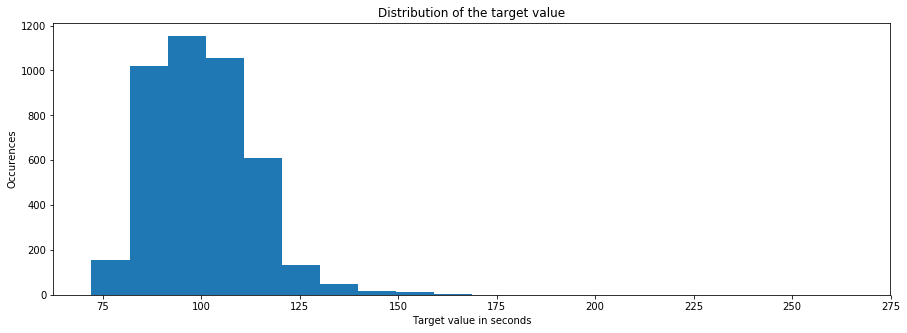

In [5]:
y_train = df['y'].values
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

In [6]:
x_train=df.iloc[:,2:]

In [7]:
print('Feature types:')
x_train.dtypes.value_counts()

Feature types:


int64     368
object      8
dtype: int64

In [8]:
#now lets just check for how many different type of columns that we are having

In [18]:
counts = [[], [], []]
for c in x_train:
    typ = df[c].dtype
    uniq = len(np.unique(df[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {}  Categorical features: {}\n'.format([len(c) for c in counts][0],[len(c) for c in counts][1],[len(c) for c in counts][2]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])


Constant features: 12 Binary features: 356  Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


so now here we are having the total of 12 constant feature which are basically not that much usefull so we could even drop it.
(constant means either all 0 or all 1).

and total of 356 are binary feature  and 8 are categorical feature.

### Categorical Data

In [20]:
categorical=[feature for feature in x_train.columns if x_train[feature].dtype=='O']

In [21]:
categorical

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

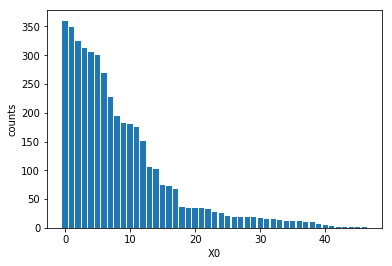

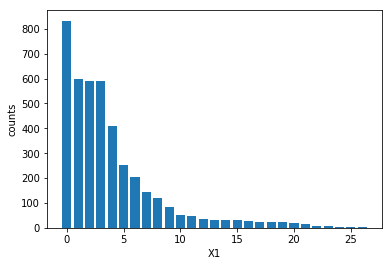

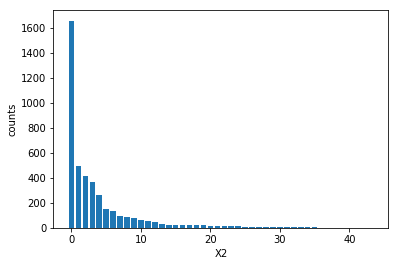

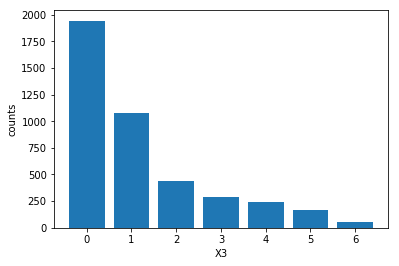

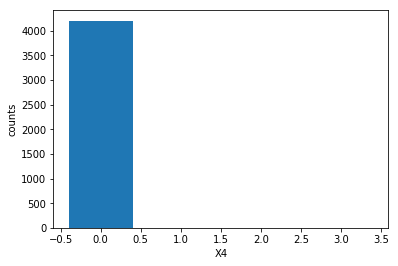

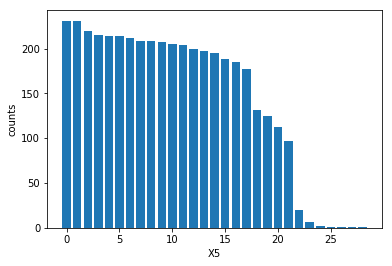

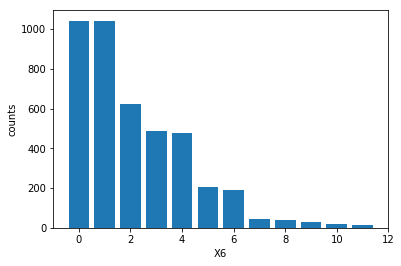

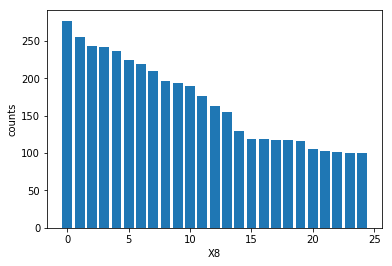

In [34]:
for feature in categorical:
    value_count=x_train[feature].value_counts()
    plt.bar(range(len(value_count)),value_count.values)
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.show()

Label encoding

In [35]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [36]:
for feature in categorical:
    x_train[feature]=label_encoder.fit_transform(x_train[feature])

x_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


there is not only one way for encoding of the categorical variable.
WE can replace it with the number of times it occur on dataset or percentage of occurunce , and many more

In [37]:
y_train=df.iloc[:,1]

In [38]:
#now we are having the proper dataset to feed into ML model

In [39]:
x_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


### Test_data_Processing

In [46]:
#importing the test data
x_test_df=pd.read_csv('test.csv')

In [47]:
x_test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
x_test=x_test_df.iloc[:,1:] # strting from 1 because to remove the Id column 

In [49]:
for feature in categorical:
    x_test[feature]=label_encoder.fit_transform(x_test[feature])

x_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


### ML MODEL

In [40]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [63]:
x_train2, x_valid, y_train2, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=100)

In [64]:
d_train = xgb.DMatrix(x_train2, label=y_train2)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)
#this Dmatrix is for the proper dataset(or proper type of data) to feed into xgboost

In [65]:
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

In [66]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

In [67]:
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

regressor = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score,maximize=True,verbose_eval=10)

[23:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.79678	valid-rmse:99.65549	train-r2:-60.87626	valid-r2:-56.69051
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.88855	valid-rmse:81.74812	train-r2:-40.47750	valid-r2:-37.82017
[20]	train-rmse:66.28261	valid-rmse:67.14357	train-r2:-26.85081	valid-r2:-25.18851
[30]	train-rmse:54.38230	valid-rmse:55.24823	train-r2:-17.74795	valid-r2:-16.73122
[40]	train-rmse:44.70117	valid-rmse:45.57488	train-r2:-11.66708	valid-r2:-11.06572
[50]	train-rmse:36.84291	valid-rmse:37.72564	train-r2:-7.60492	valid-r2:-7.26752
[60]	train-rmse:30.48348	valid-rmse:31.37651	train-r2:-4.89071	valid-r2:-4.71888
[70]	train-rmse:25.35902	valid-rmse:26.26670	train-r2:-3.07665	valid-r2:-3.00786
[80]	train-rmse:21.25504	

we can directly apply the x_train data to xgb.train but i get the error, after looking and searching for sometime i get to know that xgb.train require data in matrix form and thats why we give it to dmetrix for data conversion

As our R score is not that much good but still this is a nice one becuase when i show the leaderboard , the max score is arround 0.55
but still the work is on on it for much improvement


posibilities :  we can try with different ML algorithems also (i have tried with randomforest but i got the better result with the xgboost).
we can do the hyperperameter tuning to find the best perameter.
even we can also train it onto the ANN for better performance.